In [1]:
file = open('../out_test_cleaned.txt', 'r')
ids = []
dates = []
wavelens = []
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

for line in file.readlines():
    id_ = line[[i for i, letter in enumerate(line) if letter == '/'][-1]+1:].split('.')[0]
    if 'wd' in id_:
        id_ = line[[i for i, letter in enumerate(line) if letter == '/'][-1]+1:].split('.')[1]
    for month in months:
        moindex = line.find(month)
        if moindex != -1:
            date = line[moindex-2:moindex+6]
            if line[moindex+3] == '/':
                date = date.split('/')[0] + date.split('/')[1]
            else:
                date = date.split('/')[0]
            break
    if 'id_' != '':
        ids.append(id_)
        dates.append(date)
    wavelen = line[line.find('2.'):line.find('2.')+4].replace('/', '')
    wavelens.append(float(wavelen))
file.close()

from datetime import datetime
import pandas as pd
df = pd.read_csv('../ls_nostitch1.csv')
date = []
wavelen = []
for row in df.iterrows():
    id_ = row[1]['obsid']
    try:
        date.append(datetime.strptime(dates[ids.index(id_)], '%y%b%d'))
        wavelen.append(wavelens[ids.index(id_)])
    except:
        date.append('')
        wavelen.append('')
df['date'] = date
df['wavelen'] = wavelen
df.head()
df = df[df['date'] != '']
df = df[df.date.notnull()]
df

,obsid,lonstart,lonend,freq,power,fap,date,wavelen
0,jcf041046,212,442,[0.3130434782608696 0.9391304347826087 1.5652...,[3.6937787500990433 3.430172440591277 0.55777...,[4.375227249382902e-34 5.954538378831842e-33 ...,2015-12-14,2.16
1,jcf207212,359,595,[0.3050847457627119 0.9152542372881356 1.5254...,[9.192405793606605 8.336109653625932 0.783102...,[3.3724824483840595e-63 5.458945968206288e-61...,2010-06-24,2.3
2,jcf0038900398,186,412,[7.327433628318585 7.964601769911504 0.318584...,[1.384423960260764 1.022579998146142 0.353056...,[1.0816352225048015e-17 4.724614100717587e-15...,2017-05-20,2.12
3,j0349,39,278,[0.301255230125523 0.9037656903765691 1.50627...,[12.738728719974933 12.27190997219708 0.55750...,[5.125106510320959e-35 8.904818631273209e-34 ...,1997-09-19,2.14
4,cal_jc01260131,58,293,[0.3063829787234042 0.9191489361702125 1.5319...,[9.184249974513534 7.808457769227422 0.901841...,[1.7238664783863349e-81 3.630666107043772e-80...,2009-08-05,2.3
...,...,...,...,...,...,...,...,...
1116,jcf115120,449,682,[2.163090128755365 2.7811158798283264 1.54506...,[4.846076416836878 3.391658791365966 0.636311...,[1.7395153247344817e-41 3.4995724277482786e-4...,2010-06-25,2.17
1117,jcf06950697,7,264,[0.2801556420233463 0.840466926070039 1.40077...,[0.45373966922664466 0.4532001321892208 0.439...,[4.622191361248287e-27 1.1483979908076704e-25...,1999-11-26,2.03
1118,jf0151,309,535,[0.3185840707964602 0.9557522123893805 1.5929...,[3.7530035142798406 2.8734443081807615 0.7830...,[9.179105236212056e-59 8.981196713737838e-58 ...,1999-01-30,2.1
1119,jc00630066,112,384,[0.2647058823529412 0.7941176470588236 1.3235...,[2.7833098254808015 2.7390282519756077 0.6297...,[1.317599063190909e-44 9.235495722111987e-43 ...,2009-07-20,2


In [5]:
startdates = [datetime(1996, 4, 1), datetime(2000, 1, 1),
              datetime(2004, 4, 1), datetime(2009, 5, 1),
              datetime(2012, 3, 1), datetime(2014, 10, 1),
              datetime(2017, 4, 1)]
enddates = [datetime(1997, 12, 1), datetime(2002, 5, 1),
            datetime(2007, 1, 1), datetime(2010, 10, 1),
            datetime(2013, 6, 1), datetime(2016, 2, 1),
            datetime(2019, 1, 1)]

In [6]:
import math
def wherenonzero(arr):
    indices = []
    for idx in range(len(arr)):
        if arr[idx] != 0:
            indices.append(idx)
    return indices

def wherenotnan(arr):
    indices = []
    for idx in range(len(arr)):
        if not math.isnan(arr[idx]):
            indices.append(idx)
    return indices

import numpy as np
import matplotlib.pyplot as plt
def pointsify(df, nhighest=10, plot=True):
    flattened_dates = []
    flattened_wavenumbers = []
    flattened_wavepowers = []
    flattened_fap = []
    for row in df.iterrows():
        freq = row[1][' freq'][2:-1].split(' ')
        power = row[1][' power'][2:-1].split(' ')
        fap = row[1][' fap'][2:-1].split(' ')
        for i in range(nhighest):
            try:
                flattened_dates.append(row[1]['date'].to_pydatetime())
                flattened_wavenumbers.append(float(freq[i]))
                flattened_wavepowers.append(float(power[i]))
                flattened_fap.append(float(fap[i]))
            except:
                pass

    good_indices = list(set(wherenonzero(flattened_wavenumbers)) & set(wherenotnan(flattened_wavenumbers)))
    # good_indices = wherenonzero(flattened_wavenumbers)

    flattened_dates = np.array(flattened_dates)[good_indices].tolist()
    flattened_wavenumbers = np.array(flattened_wavenumbers)[good_indices]
    flattened_wavepowers = np.array(flattened_wavepowers)[good_indices]
    flattened_fap = np.array(flattened_fap)[good_indices]

    if plot:
        plt.figure(figsize=(18,8))
        plt.scatter(flattened_dates, flattened_wavepowers)
        plt.vlines(startdates, ymin=0, ymax=150)
        plt.vlines(enddates, ymin=0, ymax=150, color='red')
        n = len(flattened_wavepowers)
        plt.title(f'n={n}')
        plt.show()
    return flattened_dates, flattened_wavepowers, flattened_fap

from dateutil.relativedelta import relativedelta
def fallsinbin(obsdate, monthsleeway=6, onlystarts=False, onlyends=False):
    if onlystarts:
        reldates = startdates
    elif onlyends:
        reldates = enddates
    else:
        reldates = startdates+enddates
    for date in reldates:
        if obsdate < date+relativedelta(months=+monthsleeway) and obsdate > date+relativedelta(months=-monthsleeway):
            return True
    return False
def fallsinbin_forward(obsdate, monthsleeway=3, onlystarts=False, onlyends=False):
    if onlystarts:
        reldates = startdates
    elif onlyends:
        reldates = enddates
    else:
        reldates = startdates+enddates
    for date in reldates:
        if obsdate < date+relativedelta(months=+monthsleeway) and obsdate > date:
            return True
    return False
def fallsinbin_backward(obsdate, monthsleeway=3, onlystarts=False, onlyends=False):
    if onlystarts:
        reldates = startdates
    elif onlyends:
        reldates = enddates
    else:
        reldates = startdates+enddates
    for date in reldates:
        if obsdate < date and obsdate > date+relativedelta(months=-monthsleeway):
            return True
    return False
def fallsinexpansion(obsdate):
    for idx in range(len(startdates)):
        if obsdate > startdates[idx] and obsdate < enddates[idx]:
            return True
    return False

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def custompointsify(df, mos=3, plot=False, plottitle='', a=1, b=6, onlystarts=False, onlyends=False):
    obsids = []
    flattened_dates = []
    flattened_wavenumbers = []
    flattened_wavepowers = []
    flattened_fap = []
    flattened_wavelens = []
    flattened_lonavgs = []
    for row in df.iterrows():
        obsid = row[1]['obsid']
        freq = row[1][' freq'][2:-1].split(' ')
        power = row[1][' power'][2:-1].split(' ')
        fap = row[1][' fap'][2:-1].split(' ')
        wavelen = float(row[1]['wavelen'])
        lonavg = (row[1][' lonstart']+row[1][' lonend'])/2
        
        if float(power[0]) < 70 or ('flat' not in obsid and 'cal' not in obsid and 'jcf' in obsid):
            obsids.append(obsid)
            if fallsinbin(row[1]['date'].to_pydatetime(), monthsleeway=mos, onlystarts=onlystarts, onlyends=onlyends):
                for i in range(a):
                    try:
                        flattened_dates.append(row[1]['date'].to_pydatetime())
                        flattened_wavenumbers.append(float(freq[i]))
                        flattened_wavepowers.append(float(power[i]))
                        flattened_fap.append(float(fap[i]))
                        flattened_wavelens.append(wavelen)
                        flattened_lonavgs.append(lonavg)
                    except:
                        pass
            else:
                for i in range(b):
                    try:
                        flattened_dates.append(row[1]['date'].to_pydatetime())
                        flattened_wavenumbers.append(float(freq[i]))
                        flattened_wavepowers.append(float(power[i]))
                        flattened_fap.append(float(fap[i]))
                        flattened_wavelens.append(wavelen)
                        flattened_lonavgs.append(lonavg)
                    except:
                        pass
                
    good_indices = list(set(wherenonzero(flattened_wavenumbers)) & set(wherenotnan(flattened_wavenumbers)))
    # good_indices = wherenonzero(flattened_wavenumbers)

    flattened_dates = np.array(flattened_dates)[good_indices].tolist()
    flattened_wavenumbers = np.array(flattened_wavenumbers)[good_indices]
    flattened_wavepowers = np.array(flattened_wavepowers)[good_indices]
    flattened_fap = np.array(flattened_fap)[good_indices]

    if plot:
        plt.figure(figsize=(18,8))
        plt.scatter(flattened_dates, flattened_wavepowers * (1-flattened_fap))
        plt.vlines(startdates, ymin=0, ymax=150)
        plt.vlines(enddates, ymin=0, ymax=150, color='red')
        n = len(flattened_wavepowers)
        if plottitle == '':
            plt.title(f'n={n}')
        else:
            plt.title(plottitle)
        plt.show()
    return obsids, flattened_dates, flattened_wavepowers, flattened_fap, flattened_wavelens, flattened_lonavgs

In [5]:
def pointsify_moreinfo(df, nhighest=10, plot=True):
    flattened_dates = []
    flattened_wavenumbers = []
    flattened_wavepowers = []
    lonavg = []
    wavelens = []
    flattened_fap = []
    for row in df.iterrows():
        freq = row[1][' freq'][2:-1].split(' ')
        power = row[1][' power'][2:-1].split(' ')
        fap = row[1][' fap'][2:-1].split(' ')
        lonstart = row[1][' lonstart']
        lonend = row[1][' lonend']
        wavelen = row[1]['wavelen']
        for i in range(nhighest):
            try:
                flattened_dates.append(row[1]['date'].to_pydatetime())
                flattened_wavenumbers.append(float(freq[i]))
                flattened_wavepowers.append(float(power[i]))
                flattened_fap.append(float(fap[i]))
                lonavg.append((lonstart + lonend) / 2)
                wavelens.append(wavelen)
            except:
                pass

    good_indices = list(set(wherenonzero(flattened_wavenumbers)) & set(wherenotnan(flattened_wavenumbers)))
    # good_indices = wherenonzero(flattened_wavenumbers)

    flattened_dates = np.array(flattened_dates)[good_indices].tolist()
    flattened_wavenumbers = np.array(flattened_wavenumbers)[good_indices]
    flattened_wavepowers = np.array(flattened_wavepowers)[good_indices]
    flattened_fap = np.array(flattened_fap)[good_indices]

    if plot:
        plt.figure(figsize=(18,8))
        plt.scatter(flattened_dates, flattened_wavepowers)
        plt.vlines(startdates, ymin=0, ymax=150)
        plt.vlines(enddates, ymin=0, ymax=150, color='red')
        n = len(flattened_wavepowers)
        plt.title(f'n={n}')
        plt.show()
    return flattened_dates, flattened_wavepowers, flattened_fap, lonavg, wavelens

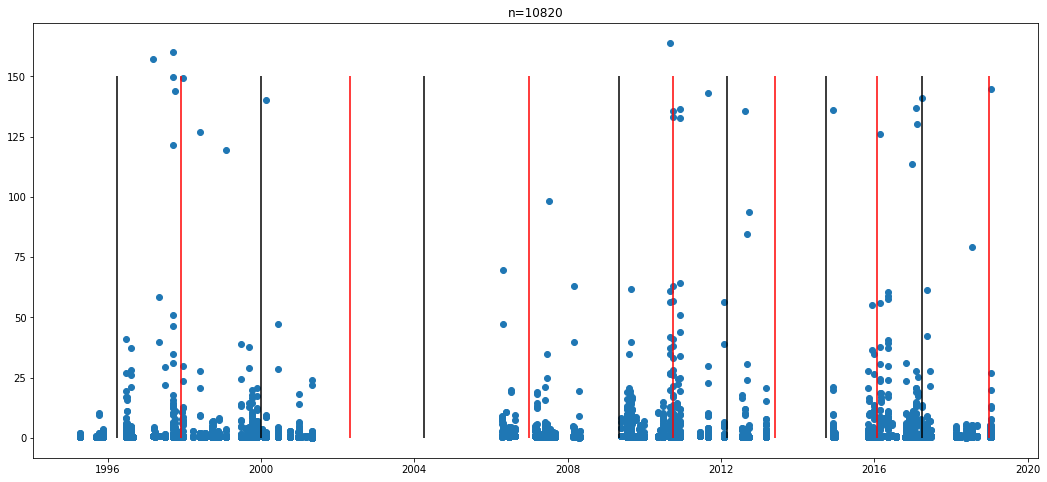

In [138]:
flattened_dates, flattened_wavepowers, flattened_fap = pointsify(df, plot=True)

NameError: name 'farpts' is not defined

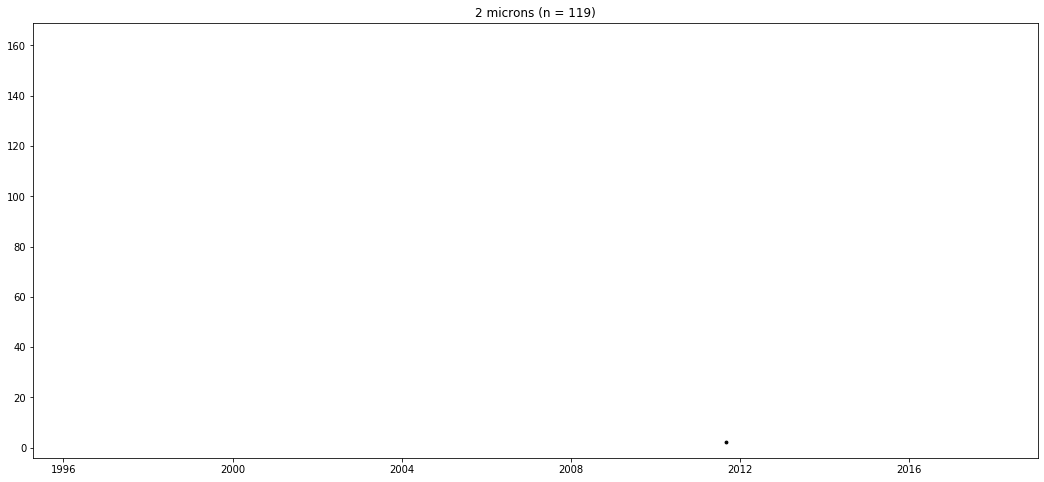

In [12]:
for wavelen in [2, 2.03, 2.07, 2.1, 2.12, 2.14, 2.16, 2.17, 2.23, 2.27, 2.3]:
    df_wavelen = df[df['wavelen'] == wavelen]
    n = df_wavelen.shape[0]
    date_wavelen, wavepowers_wavelen, fap_wavelen = custompointsify(df_wavelen, plottitle=f'{wavelen} microns (n = {n})')
    plt.figure(figsize=(18,8))
    plt.title(f'{wavelen} microns (n = {n})')
    plt.ylim(-4, np.max(flattened_wavepowers[~np.isnan(flattened_wavepowers)])+5)
    plt.xlim(np.min(flattened_dates), np.max(flattened_dates))
    for obsidx in range(len(date_wavelen)):
        if not np.isnan(wavepowers_wavelen[obsidx]):
            if fallsinbin(date_wavelen[obsidx], monthsleeway=3):
                plt.scatter(date_wavelen[obsidx], wavepowers_wavelen[obsidx], c='red', s=8)
                closepts.append(wavepowers_wavelen[obsidx])
                closecount += 1
            else:
                plt.scatter(date_wavelen[obsidx], wavepowers_wavelen[obsidx], c='black', s=8)
                farpts.append(wavepowers_wavelen[obsidx])
                farcount += 1
    plt.show()
    plt.clf()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def pointsify_onedir(df, mos=3, plot=False, plottitle='', a=1, b=6, forward=True, onlystarts=False, onlyends=False):
    flattened_dates = []
    flattened_wavenumbers = []
    flattened_wavepowers = []
    flattened_fap = []
    for row in df.iterrows():
        freq = row[1][' freq'][2:-1].split(' ')
        power = row[1][' power'][2:-1].split(' ')
        fap = row[1][' fap'][2:-1].split(' ')
        if forward:
            if fallsinbin_forward(row[1]['date'].to_pydatetime(), monthsleeway=mos, onlystarts=onlystarts, onlyends=onlyends):
                for i in range(a):
                    try:
                        flattened_dates.append(row[1]['date'].to_pydatetime())
                        flattened_wavenumbers.append(float(freq[i]))
                        flattened_wavepowers.append(float(power[i]))
                        flattened_fap.append(float(fap[i]))
                    except:
                        pass
            else:
                for i in range(b):
                    try:
                        flattened_dates.append(row[1]['date'].to_pydatetime())
                        flattened_wavenumbers.append(float(freq[i]))
                        flattened_wavepowers.append(float(power[i]))
                        flattened_fap.append(float(fap[i]))
                    except:
                        pass
        else:
            if fallsinbin_backward(row[1]['date'].to_pydatetime(), monthsleeway=mos, onlystarts=onlystarts, onlyends=onlyends):
                for i in range(a):
                    try:
                        flattened_dates.append(row[1]['date'].to_pydatetime())
                        flattened_wavenumbers.append(float(freq[i]))
                        flattened_wavepowers.append(float(power[i]))
                        flattened_fap.append(float(fap[i]))
                    except:
                        pass
            else:
                for i in range(b):
                    try:
                        flattened_dates.append(row[1]['date'].to_pydatetime())
                        flattened_wavenumbers.append(float(freq[i]))
                        flattened_wavepowers.append(float(power[i]))
                        flattened_fap.append(float(fap[i]))
                    except:
                        pass
    good_indices = list(set(wherenonzero(flattened_wavenumbers)) & set(wherenotnan(flattened_wavenumbers)))
    # good_indices = wherenonzero(flattened_wavenumbers)

    flattened_dates = np.array(flattened_dates)[good_indices].tolist()
    flattened_wavenumbers = np.array(flattened_wavenumbers)[good_indices]
    flattened_wavepowers = np.array(flattened_wavepowers)[good_indices]
    flattened_fap = np.array(flattened_fap)[good_indices]

    if plot:
        plt.figure(figsize=(18,8))
        plt.scatter(flattened_dates, flattened_wavepowers * (1-flattened_fap))
        plt.vlines(startdates, ymin=0, ymax=150)
        plt.vlines(enddates, ymin=0, ymax=150, color='red')
        n = len(flattened_wavepowers)
        if plottitle == '':
            plt.title(f'n={n}')
        else:
            plt.title(plottitle)
        plt.show()
    return flattened_dates, flattened_wavepowers, flattened_fap

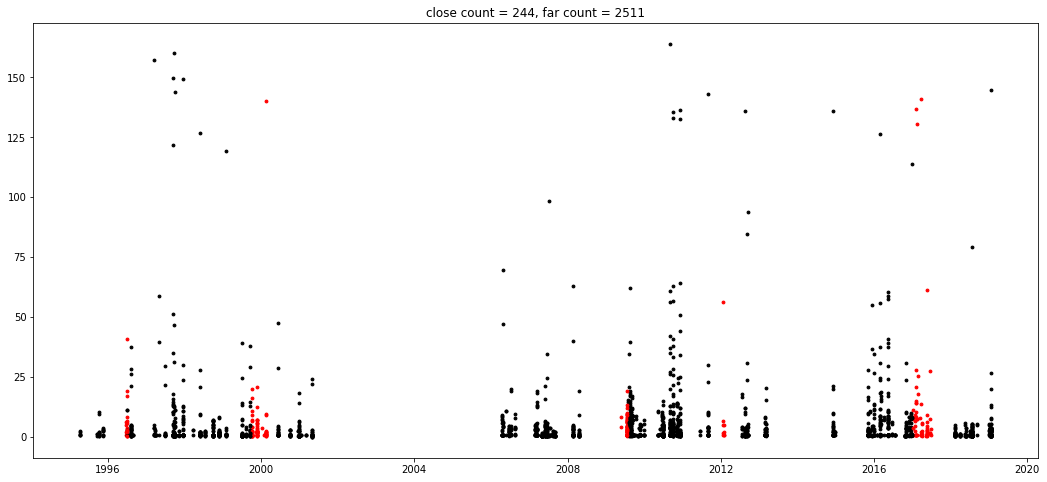

mean(red pts) = 7.012993490132414
median(red pts) = 2.3376740955719706
mean(black pts) = 4.796946963561253
median(black pts) = 0.8829330181331574


In [335]:
#starts
flattened_dates, flattened_wavepowers, flattened_fap = custompointsify(df, mos=3, b=3, onlystarts=True)
plt.figure(figsize=(18,8))
closecount = 0
farcount = 0
closepts = []
farpts = []
for obsidx in range(len(flattened_dates)):
    if not np.isnan(flattened_wavepowers[obsidx]):
        if fallsinbin(flattened_dates[obsidx], monthsleeway=3, onlystarts=True):
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
            closepts.append(flattened_wavepowers[obsidx])
            closecount += 1
        else:
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
            farpts.append(flattened_wavepowers[obsidx])
            farcount += 1
plt.title(f'close count = {closecount}, far count = {farcount}')
plt.show()
print(f'mean(red pts) = {np.sum(closepts)/closecount}')
print(f'median(red pts) = {np.median(closepts)}')
print(f'mean(black pts) = {np.sum(farpts)/farcount}')
print(f'median(black pts) = {np.median(farpts)}')

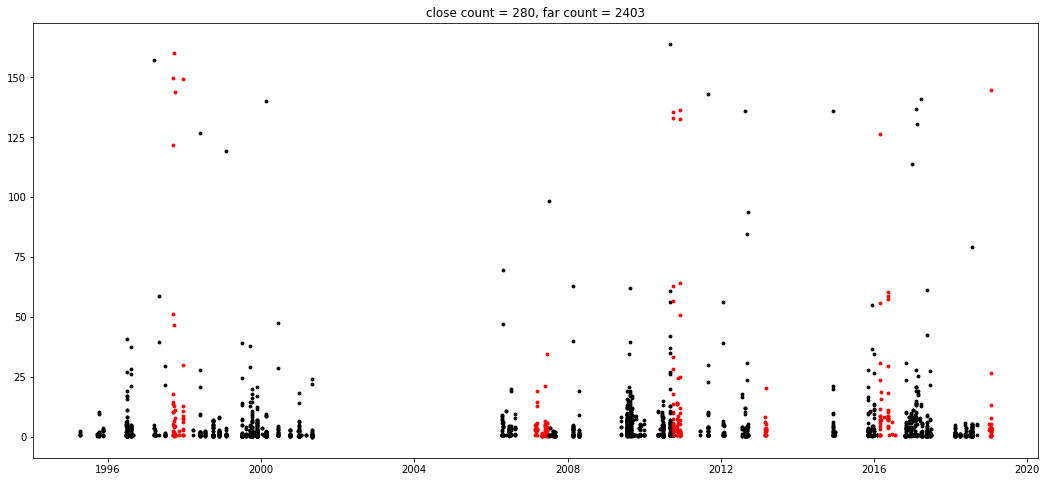

mean(red pts) = 12.34662247365337
median(red pts) = 3.455438126994422
mean(black pts) = 4.032530279356397
median(black pts) = 0.8688053464576961


In [336]:
#ends
flattened_dates, flattened_wavepowers, flattened_fap = custompointsify(df, mos=3, b=3, onlyends=True)
plt.figure(figsize=(18,8))
closecount = 0
farcount = 0
closepts = []
farpts = []
for obsidx in range(len(flattened_dates)):
    if not np.isnan(flattened_wavepowers[obsidx]):
        if fallsinbin(flattened_dates[obsidx], monthsleeway=3, onlyends=True):
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
            closepts.append(flattened_wavepowers[obsidx])
            closecount += 1
        else:
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
            farpts.append(flattened_wavepowers[obsidx])
            farcount += 1
plt.title(f'close count = {closecount}, far count = {farcount}')
plt.show()
print(f'mean(red pts) = {np.sum(closepts)/closecount}')
print(f'median(red pts) = {np.median(closepts)}')
print(f'mean(black pts) = {np.sum(farpts)/farcount}')
print(f'median(black pts) = {np.median(farpts)}')

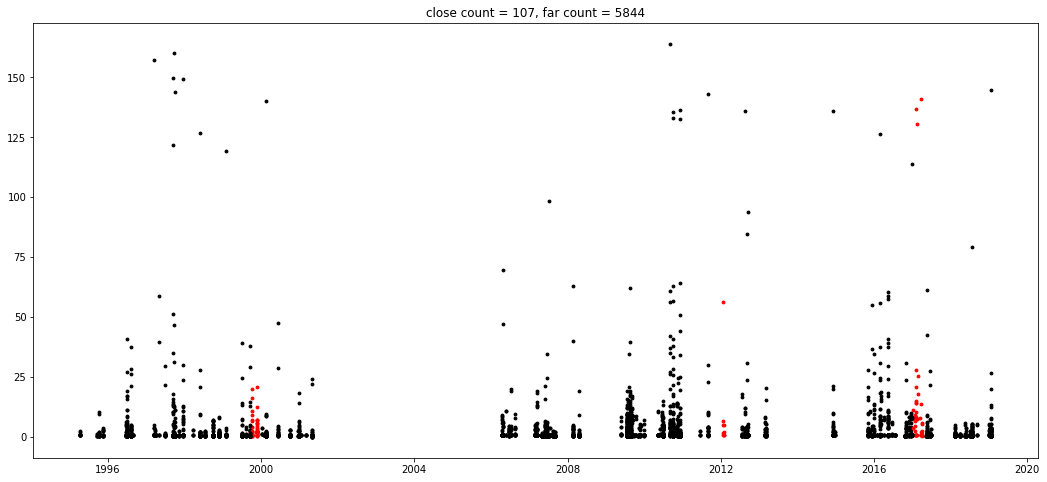

mean(red pts) = 9.090742652089308
median(red pts) = 2.329053695471865
mean(black pts) = 2.6243473199223732
median(black pts) = 0.7516323792382962


In [347]:
#pre-starts
flattened_dates, flattened_wavepowers, flattened_fap = pointsify_onedir(df, mos=3, onlystarts=True, forward=False)
plt.figure(figsize=(18,8))
closecount = 0
farcount = 0
closepts = []
farpts = []
for obsidx in range(len(flattened_dates)):
    if not np.isnan(flattened_wavepowers[obsidx]):
        if fallsinbin_backward(flattened_dates[obsidx], monthsleeway=3, onlystarts=True):
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
            closepts.append(flattened_wavepowers[obsidx])
            closecount += 1
        else:
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
            farpts.append(flattened_wavepowers[obsidx])
            farcount += 1
plt.title(f'close count = {closecount}, far count = {farcount}')
plt.show()
print(f'mean(red pts) = {np.sum(closepts)/closecount}')
print(f'median(red pts) = {np.median(closepts)}')
print(f'mean(black pts) = {np.sum(farpts)/farcount}')
print(f'median(black pts) = {np.median(farpts)}')

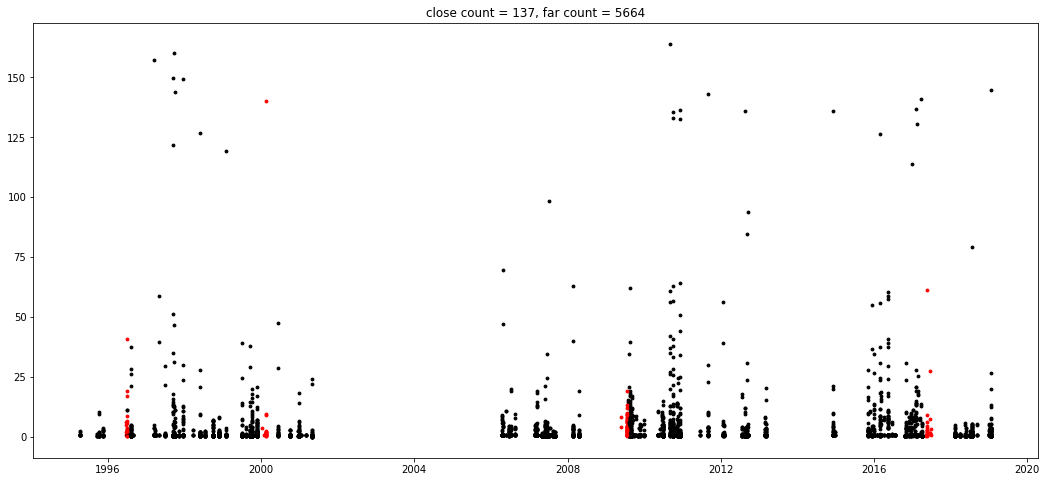

mean(red pts) = 5.390225896487247
median(red pts) = 2.3462944956720766
mean(black pts) = 2.7326553983840594
median(black pts) = 0.7503375372103697


In [348]:
#post-starts
flattened_dates, flattened_wavepowers, flattened_fap = pointsify_onedir(df, mos=3, onlystarts=True, forward=True)
plt.figure(figsize=(18,8))
closecount = 0
farcount = 0
closepts = []
farpts = []
for obsidx in range(len(flattened_dates)):
    if not np.isnan(flattened_wavepowers[obsidx]):
        if fallsinbin_forward(flattened_dates[obsidx], monthsleeway=3, onlystarts=True):
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
            closepts.append(flattened_wavepowers[obsidx])
            closecount += 1
        else:
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
            farpts.append(flattened_wavepowers[obsidx])
            farcount += 1
plt.title(f'close count = {closecount}, far count = {farcount}')
plt.show()
print(f'mean(red pts) = {np.sum(closepts)/closecount}')
print(f'median(red pts) = {np.median(closepts)}')
print(f'mean(black pts) = {np.sum(farpts)/farcount}')
print(f'median(black pts) = {np.median(farpts)}')

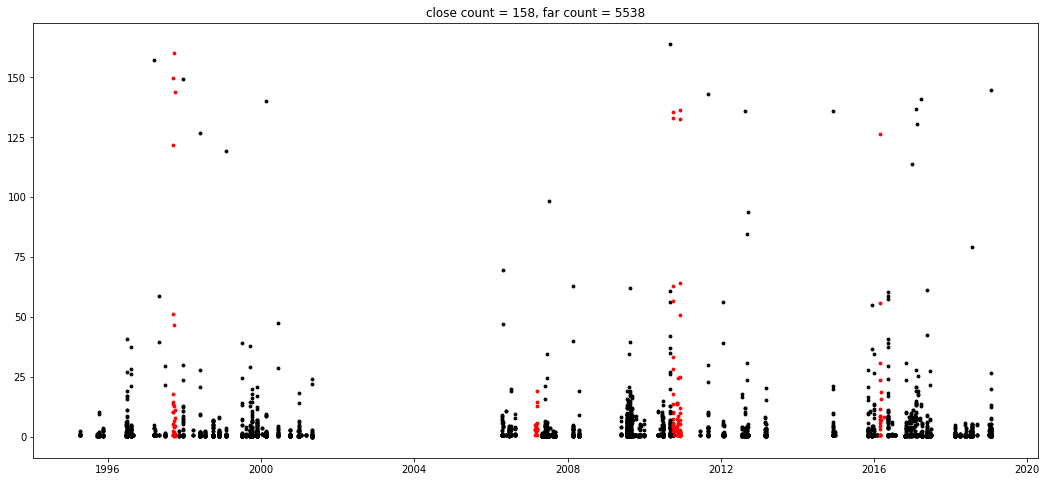

mean(red pts) = 15.324383842043819
median(red pts) = 3.737847646420767
mean(black pts) = 2.3915249739843865
median(black pts) = 0.7486769861452519


In [345]:
#pre-ends
flattened_dates, flattened_wavepowers, flattened_fap = pointsify_onedir(df, mos=3, onlyends=True, forward=False)
plt.figure(figsize=(18,8))
closecount = 0
farcount = 0
closepts = []
farpts = []
for obsidx in range(len(flattened_dates)):
    if not np.isnan(flattened_wavepowers[obsidx]):
        if fallsinbin_backward(flattened_dates[obsidx], monthsleeway=3, onlyends=True):
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
            closepts.append(flattened_wavepowers[obsidx])
            closecount += 1
        else:
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
            farpts.append(flattened_wavepowers[obsidx])
            farcount += 1
plt.title(f'close count = {closecount}, far count = {farcount}')
plt.show()
print(f'mean(red pts) = {np.sum(closepts)/closecount}')
print(f'median(red pts) = {np.median(closepts)}')
print(f'mean(black pts) = {np.sum(farpts)/farcount}')
print(f'median(black pts) = {np.median(farpts)}')

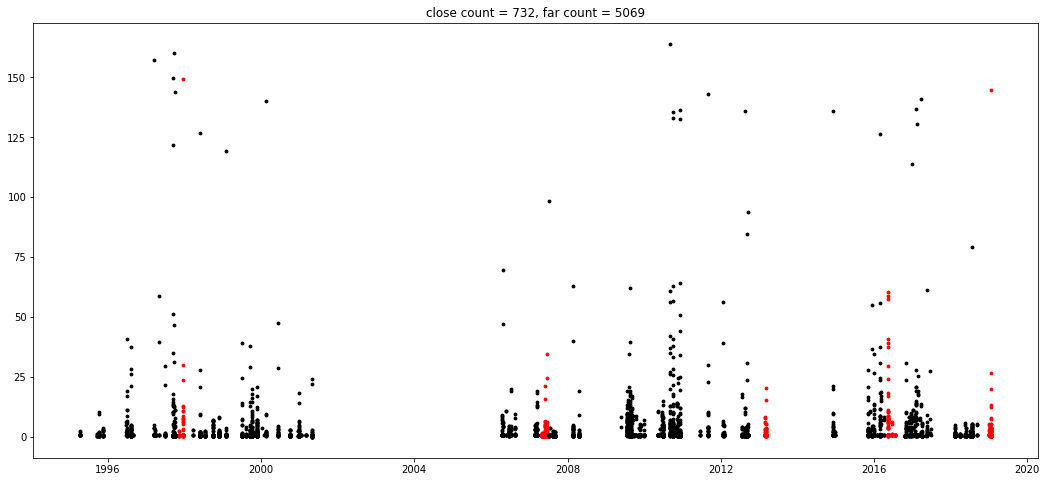

mean(red pts) = 2.6793338604487005
median(red pts) = 0.7618240186369654
mean(black pts) = 2.8121816410372094
median(black pts) = 0.7532898521285302


In [343]:
#post-ends
flattened_dates, flattened_wavepowers, flattened_fap = pointsify_onedir(df, mos=3, onlyends=True, forward=True)
plt.figure(figsize=(18,8))
closecount = 0
farcount = 0
closepts = []
farpts = []
for obsidx in range(len(flattened_dates)):
    if not np.isnan(flattened_wavepowers[obsidx]):
        if fallsinbin_forward(flattened_dates[obsidx], monthsleeway=3, onlyends=True):
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
            closepts.append(flattened_wavepowers[obsidx])
            closecount += 1
        else:
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
            farpts.append(flattened_wavepowers[obsidx])
            farcount += 1
plt.title(f'close count = {closecount}, far count = {farcount}')
plt.show()
print(f'mean(red pts) = {np.sum(closepts)/closecount}')
print(f'median(red pts) = {np.median(closepts)}')
print(f'mean(black pts) = {np.sum(farpts)/farcount}')
print(f'median(black pts) = {np.median(farpts)}')

In [287]:
#fallsinbin_forward
for m in range(1, 7):
    flattened_dates, flattened_wavepowers, flattened_fap = pointsify_onedir(df, mos=m)
    # plt.figure(figsize=(18,8))
    closecount = 0
    farcount = 0
    closepts = []
    farpts = []
    for obsidx in range(len(flattened_dates)):
        if not np.isnan(flattened_wavepowers[obsidx]):
            if fallsinbin_forward(flattened_dates[obsidx], monthsleeway=m):
    #             plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
                closepts.append(flattened_wavepowers[obsidx])
                closecount += 1
            else:
    #             plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
                farpts.append(flattened_wavepowers[obsidx])
                farcount += 1

    # plt.title(f'close count = {closecount}, far count = {farcount}')
    # plt.show()
    print(f'mean(red pts) = {np.sum(closepts)/closecount}')
    print(f'median(red pts) = {np.median(closepts)}')
    print(f'mean(black pts) = {np.sum(farpts)/farcount}')
    print(f'median(black pts) = {np.median(farpts)}')

mean(red pts) = 10.925046242492742
median(red pts) = 3.8184461861004584
mean(black pts) = 2.5888068087133864
median(black pts) = 0.745561965156883
mean(red pts) = 9.400378863029685
median(red pts) = 2.9899191709342903
mean(black pts) = 2.608314532746372
median(black pts) = 0.7468573510264781
mean(red pts) = 6.850434723547386
median(red pts) = 2.925432243991452
mean(black pts) = 2.740569300608042
median(black pts) = 0.7482371081730694
mean(red pts) = 6.6428763569296585
median(red pts) = 2.9439304975217233
mean(black pts) = 2.8091945623093664
median(black pts) = 0.7392332227316096
mean(red pts) = 6.584714956836915
median(red pts) = 2.951189000757024
mean(black pts) = 2.835114644616567
median(black pts) = 0.7394493702513554
mean(red pts) = 6.686178995274426
median(red pts) = 2.8426123869459143
mean(black pts) = 2.871718992240563
median(black pts) = 0.7395578217679015


In [289]:
#fallsinbin_backward
for m in range(1, 7):
    flattened_dates, flattened_wavepowers, flattened_fap = pointsify_onedir(df, mos=m, forward=False)
#     plt.figure(figsize=(18,8))
    closecount = 0
    farcount = 0
    closepts = []
    farpts = []

    for obsidx in range(len(flattened_dates)):
        if not np.isnan(flattened_wavepowers[obsidx]):
            if fallsinbin_backward(flattened_dates[obsidx], monthsleeway=m):
#                 plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
                closepts.append(flattened_wavepowers[obsidx])
                closecount += 1
            else:
#                 plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
                farpts.append(flattened_wavepowers[obsidx])
                farcount += 1

#     plt.title(f'close count = {closecount}, far count = {farcount}')
#     plt.show()
    print(f'mean(red pts) = {np.sum(closepts)/closecount}')
    print(f'median(red pts) = {np.median(closepts)}')
    print(f'mean(black pts) = {np.sum(farpts)/farcount}')
    print(f'median(black pts) = {np.median(farpts)}')
#     print(f'mean(all pts) = {np.sum(farpts+closepts)/(farcount+closecount)}]')
#     print(f'median(all pts) = {np.median(farpts+closepts)}')

mean(red pts) = 12.918270491195791
median(red pts) = 1.8811425342303347
mean(black pts) = 2.5912651946849032
median(black pts) = 0.7507452173293876
mean(red pts) = 13.4319106442274
median(red pts) = 3.0132548680793088
mean(black pts) = 2.448885137118219
median(black pts) = 0.7499073952869695
mean(red pts) = 12.807404191760298
median(red pts) = 3.3879461709618335
mean(black pts) = 2.3501316228087554
median(black pts) = 0.751658185015637
mean(red pts) = 12.866012015357121
median(red pts) = 3.4825686690440314
mean(black pts) = 2.2225167191667663
median(black pts) = 0.751766555477385
mean(red pts) = 12.447924543788163
median(red pts) = 3.4825686690440314
mean(black pts) = 2.189067445523317
median(black pts) = 0.7500889474254857
mean(red pts) = 11.733259609279276
median(red pts) = 3.1499859540622825
mean(black pts) = 2.170123992132769
median(black pts) = 0.7510655237488668


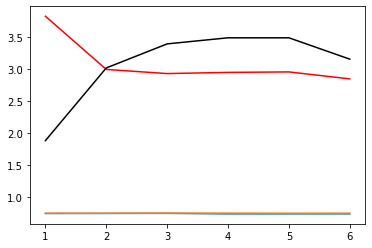

In [305]:
months = [1,2,3,4,5,6]
meanredforward = [10.925046242492742, 9.400378863029685, 6.850434723547386, 6.6428763569296585, 6.584714956836915, 6.686178995274426]
meanredbackward = [12.918270491195791, 13.4319106442274, 12.807404191760298, 12.866012015357121, 12.447924543788163, 11.733259609279276]
medredforward = [3.8184461861004584, 2.9899191709342903, 2.925432243991452, 2.9439304975217233, 2.951189000757024, 2.8426123869459143]
medredbackward = [1.8811425342303347, 3.0132548680793088, 3.3879461709618335, 3.4825686690440314, 3.4825686690440314, 3.1499859540622825]
meanblackforward = [2.5888068087133864, 2.608314532746372, 2.740569300608042, 2.8091945623093664, 2.835114644616567, 2.871718992240563]
meanblackbackward = [2.5912651946849032, 2.448885137118219, 2.3501316228087554, 2.2225167191667663, 2.189067445523317, 2.170123992132769]
medblackforward = [0.745561965156883, 0.7468573510264781, 0.7482371081730694, 0.7392332227316096, 0.7394493702513554, 0.7395578217679015]
medblackbackward = [0.7507452173293876, 0.7499073952869695, 0.751658185015637, 0.751766555477385, 0.7500889474254857, 0.7510655237488668]

# plt.plot(months, meanredforward)
# plt.plot(months, meanredbackward)
plt.plot(months, medredforward, color='red')
plt.plot(months, medredbackward, color='black')
# plt.plot(months, meanblackforward)
# plt.plot(months, meanblackbackward)
plt.plot(months, medblackforward)
plt.plot(months, medblackbackward)
plt.show()

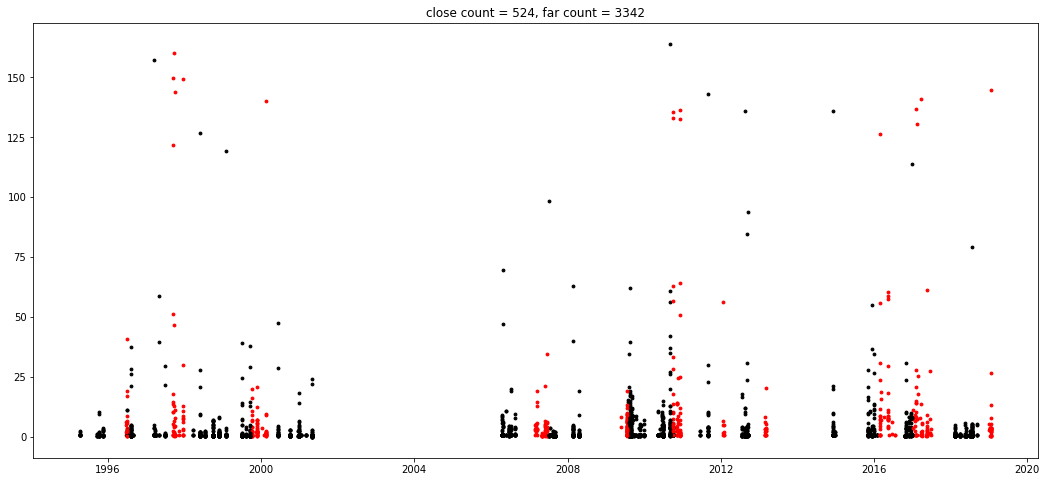

mean(red pts) = 9.863024244685596
median(red pts) = 2.982698058311966
mean(black pts) = 2.3782242961072146
median(black pts) = 0.7522161492973879
mean(all pts) = 3.3927186502342384]
median(all pts) = 0.7726461040056845


In [331]:
#6 months leeway
flattened_dates, flattened_wavepowers, flattened_fap = custompointsify(df, mos=3)
plt.figure(figsize=(18,8))
closecount = 0
farcount = 0
closepts = []
farpts = []

for obsidx in range(len(flattened_dates)):
    if not np.isnan(flattened_wavepowers[obsidx]):
        if fallsinbin(flattened_dates[obsidx], monthsleeway=3):
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
            closepts.append(flattened_wavepowers[obsidx])
            closecount += 1
        else:
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
            farpts.append(flattened_wavepowers[obsidx])
            farcount += 1
            
plt.title(f'close count = {closecount}, far count = {farcount}')
plt.show()
print(f'mean(red pts) = {np.sum(closepts)/closecount}')
print(f'median(red pts) = {np.median(closepts)}')
print(f'mean(black pts) = {np.sum(farpts)/farcount}')
print(f'median(black pts) = {np.median(farpts)}')
print(f'mean(all pts) = {np.sum(farpts+closepts)/(farcount+closecount)}]')
print(f'median(all pts) = {np.median(farpts+closepts)}')

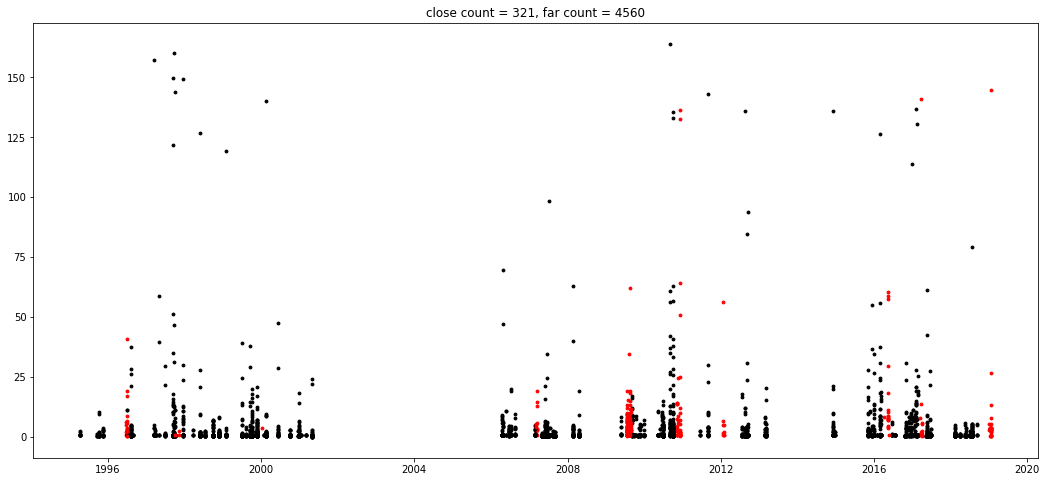

mean(red pts) = 7.4845664300602985
median(red pts) = 3.0411234970579017
mean(black pts) = 2.6841240494607446
median(black pts) = 0.73454124434472
mean(all pts) = 2.9998261605388965]
median(all pts) = 0.7472488294020596


In [262]:
#2 months leeway
flattened_dates, flattened_wavepowers, flattened_fap = custompointsify(df, mos=1)
plt.figure(figsize=(18,8))
closecount = 0
farcount = 0
closepts = []
farpts = []

for obsidx in range(len(flattened_dates)):
    if not np.isnan(flattened_wavepowers[obsidx]):
        if fallsinbin(flattened_dates[obsidx], monthsleeway=1):
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='red', s=8)
            closepts.append(flattened_wavepowers[obsidx])
            closecount += 1
        else:
            plt.scatter(flattened_dates[obsidx], flattened_wavepowers[obsidx], c='black', s=8)
            farpts.append(flattened_wavepowers[obsidx])
            farcount += 1
            
plt.title(f'close count = {closecount}, far count = {farcount}')
plt.show()
print(f'mean(red pts) = {np.sum(closepts)/closecount}')
print(f'median(red pts) = {np.median(closepts)}')
print(f'mean(black pts) = {np.sum(farpts)/farcount}')
print(f'median(black pts) = {np.median(farpts)}')
print(f'mean(all pts) = {np.sum(farpts+closepts)/(farcount+closecount)}]')
print(f'median(all pts) = {np.median(farpts+closepts)}')

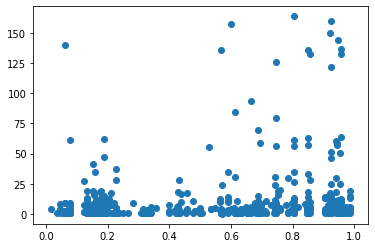

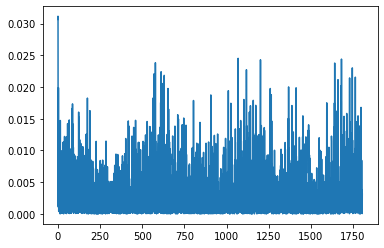

In [412]:
# searching for periodicity within expansion events
flattened_dates, flattened_wavepowers, flattened_fap = custompointsify(df, b=1)
powers = np.array(flattened_wavepowers) * (1 - np.array(flattened_fap))
foldeddates = []
foldedpowers = []
for dateidx in range(len(startdates)):
    for obsidx in range(len(flattened_dates)):
        if flattened_dates[obsidx] > startdates[dateidx] and flattened_dates[obsidx] < enddates[dateidx]:
            tnormed = (datetime.timestamp(flattened_dates[obsidx]) - datetime.timestamp(startdates[dateidx]))/(datetime.timestamp(enddates[dateidx])-datetime.timestamp(startdates[dateidx]))
            foldeddates.append(tnormed)
            foldedpowers.append(powers[obsidx])
plt.scatter(foldeddates, foldedpowers)
plt.show()

from astropy.timeseries import LombScargle
frequency, power = LombScargle(np.delete(foldeddates, np.argwhere(np.isnan(foldedpowers))), 
                               np.delete(np.array(foldedpowers), np.argwhere(np.isnan(foldedpowers)))).autopower()
plt.plot(frequency, power)
plt.show()
#doesn't look like there's any periodicity

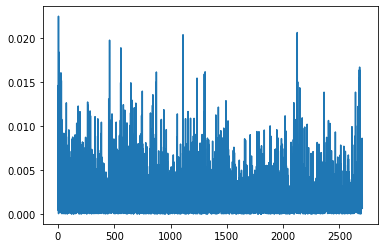

In [404]:
#test for periodicity over time
ts = np.array([datetime.timestamp(t) for t in flattened_dates])
tnormed = (t - np.min(t)) / (np.max(t) - np.min(t))
frequency, power = LombScargle(np.delete(tnormed, np.argwhere(np.isnan(flattened_wavepowers))), 
                               np.delete(np.array(flattened_wavepowers), np.argwhere(np.isnan(flattened_wavepowers)))).autopower()
plt.plot(frequency, power)
plt.show()
#once again, nothing

In [25]:
temp = np.array(obsids)[np.where(np.array(flattened_wavepowers) > 80)]
from shutil import copyfile
import os
for s in temp:
    for file in os.listdir('../imgs/nostitch'):
        if s in file:
            copyfile('../imgs/nostitch/'+file, '../imgs/nostitch/outliers/'+file)

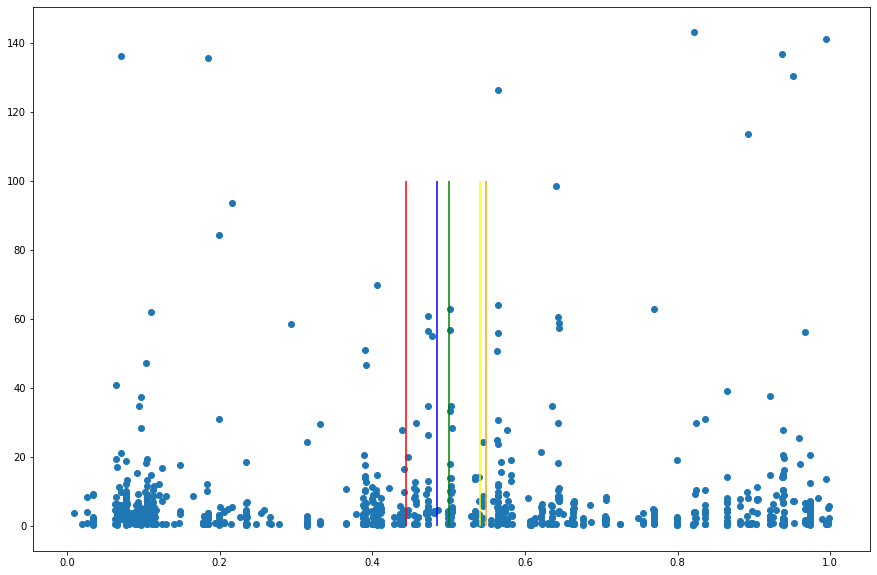

<Figure size 432x288 with 0 Axes>

In [123]:
from astropy.timeseries import LombScargle
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

#test cycles from one start date to the next
obsids, flattened_dates, flattened_wavepowers, flattened_fap, flattened_wavelens, flattened_lonavgs = custompointsify(df, b=1)
powers = np.array(flattened_wavepowers) * (1 - np.array(flattened_fap))
foldeddates = []
foldedpowers = []
foldedwavelens = []
foldedlonavgs = []
normedends = []
absdates = []
plt.figure(figsize=(15,10))
for dateidx in range(len(startdates)-1):
    normedends.append([(datetime.timestamp(enddates[dateidx])-datetime.timestamp(startdates[dateidx]))/(datetime.timestamp(startdates[dateidx+1])-datetime.timestamp(startdates[dateidx]))])
    for obsidx in range(len(flattened_dates)):
        if flattened_dates[obsidx] > startdates[dateidx] and flattened_dates[obsidx] < startdates[dateidx+1]:
            tnormed = (datetime.timestamp(flattened_dates[obsidx]) - datetime.timestamp(startdates[dateidx]))/(datetime.timestamp(startdates[dateidx+1])-datetime.timestamp(startdates[dateidx]))
            foldeddates.append(tnormed)
            absdates.append(flattened_dates[obsidx])
            foldedpowers.append(flattened_wavepowers[obsidx])
            foldedwavelens.append(flattened_wavelens[obsidx])
            foldedlonavgs.append(flattened_lonavgs[obsidx])
plt.scatter(foldeddates, foldedpowers)
for idx in range(len(normedends)-1):
    plt.vlines([normedends[idx]], ymin=0, ymax=100, color=colors[idx])
plt.show()
plt.clf()

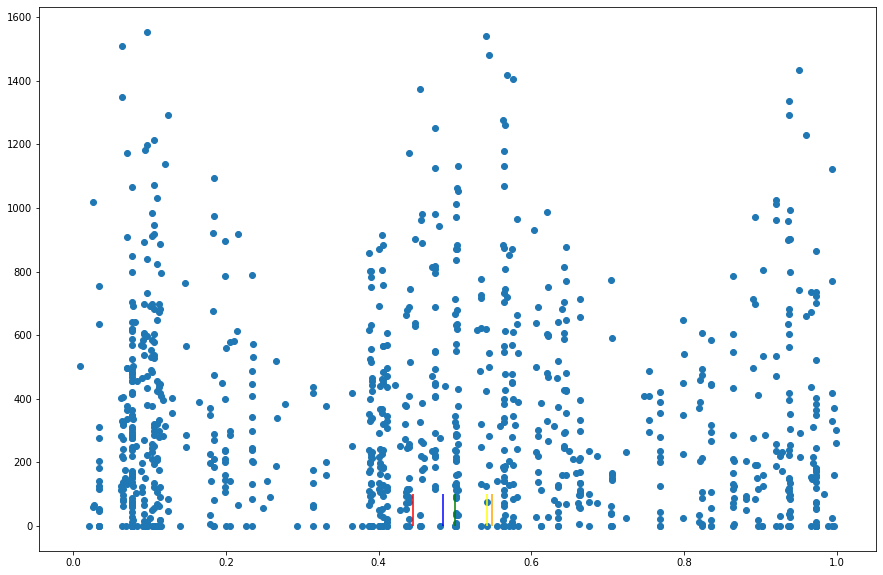

In [225]:
# import pandas
# foldeddf = pandas.DataFrame()
# foldeddf['normeddate'] = foldeddates
# foldeddf['absdate'] = absdates
# foldeddf['power'] = foldedpowers
# def sinmodel(x):
#     return np.abs(30*np.sin(2.25*3.14*x+1))

# for i, row in foldeddf.iterrows():
#     if row['power'] > 30:
#         foldeddf.iloc[i, foldeddf.columns.get_loc('power')] /= 10
#     foldeddf.iloc[i, foldeddf.columns.get_loc('power')] += random.randrange(1000)/300.0 * (random.randrange(-1, 2, 2))
#     if row['power'] > sinmodel(row['normeddate']):
#         foldeddf.iloc[i, foldeddf.columns.get_loc('power')] = sinmodel(row['normeddate'])/1.5 + random.randrange(1000)/100.0
# i = 0
# for power in foldeddf['power'].tolist():
#     if power < 0:
#         foldeddf.iloc[i, foldeddf.columns.get_loc('power')] = 0
#     i += 1
plt.figure(figsize=(15,10))
plt.scatter(foldeddf['normeddate'], foldeddf['power'])
# foldeddf['power'] = foldeddf['power'] * 50
for idx in range(len(normedends)-1):
    plt.vlines([normedends[idx]], ymin=0, ymax=100, color=colors[idx])

2.66512252042007

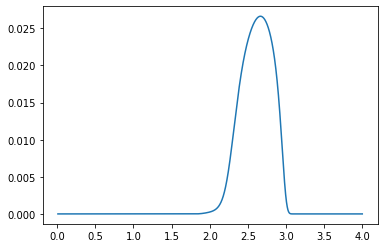

In [181]:
frequency = np.linspace(0.01, 4.00, 6000)
ls = LombScargle(foldeddf['normeddate'],
                   foldeddf['power'])
power = ls.power(frequency)
fap = ls.false_alarm_probability(power)
plt.plot(frequency, power * (1-fap))

frequency[np.argmax(power * (1-fap))]

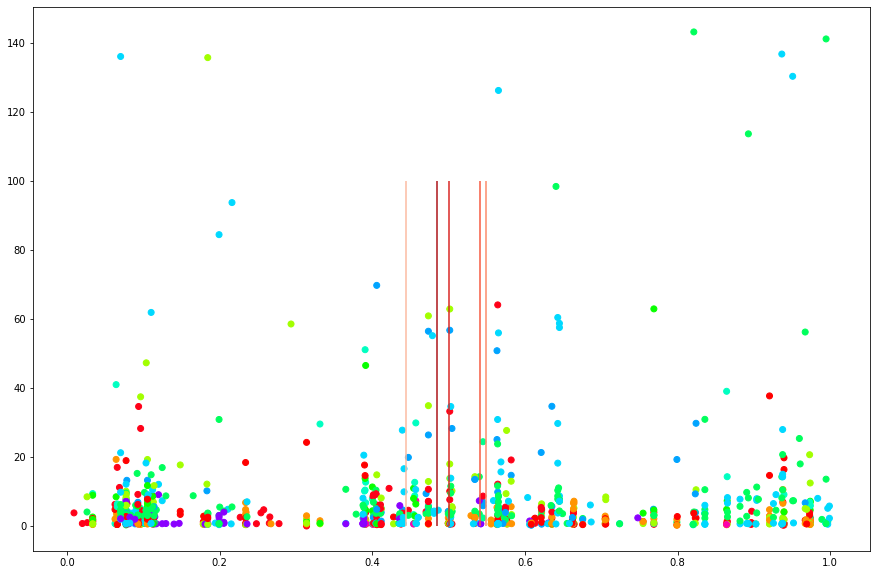

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [11]:
plt.figure(figsize=(15, 10))
# plt.ylim(-1, 100)
foldedpowers = np.array(foldedpowers)
foldeddates = np.array(foldeddates)
cmap = plt.cm.get_cmap('Reds')
colors = [cmap(i) for i in np.linspace(0.25, 1, 6)]


plt.scatter(foldeddates, foldedpowers, c=foldedwavelens, cmap='hsv')
# plt.scatter(foldeddates, foldedpowers, c=foldedlonavgs, cmap='copper')
for idx in range(len(normedends)-1):
    plt.vlines([normedends[idx]], ymin=0, ymax=100, color=colors[idx])
plt.show()

plotted = 0
for udx in set(pd):
    plotnums.append(plotted)
    plotted += pd.count(p)
plotnums.append(plotted)
# plt.savefig('graphs/normed_longitude.png')

In [210]:
wavelens = [2.0, 2.03, 2.07, 2.1, 2.2, 2.14, 2.16, 2.17, 2.23]

[2.0, 2.03, 2.07, 2.1, 2.12, 2.13, 2.14, 2.16, 2.17, 2.23]

IndexError: index 6 is out of bounds for axis 0 with size 6

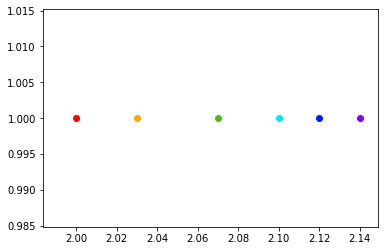

In [378]:
cmap_wavelen = cmap
for wavelen in range(len(wavelens)):
    plt.scatter(wavelens[wavelen], 1, color=cmap_wavelen[wavelen])
    
plt.scatter

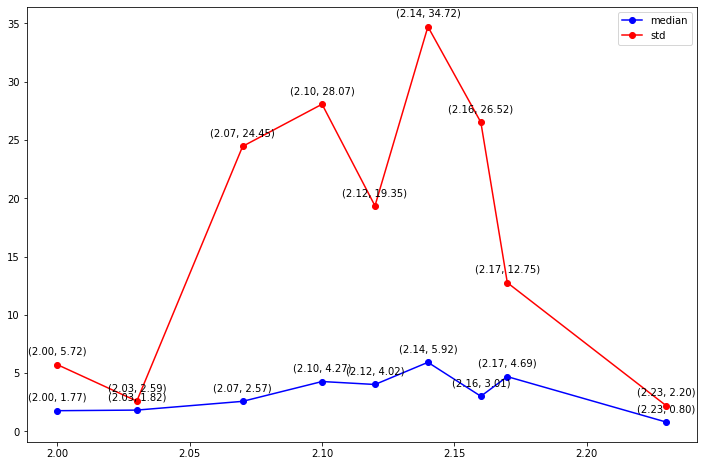

In [298]:
foldedpowers = np.array(foldedpowers)
foldedwavelens = np.array(foldedwavelens)
wavelens = []
meds = []
stds = []
ns = []
for wavelen in sorted(set(foldedwavelens))[:-2]:
#     print(f'{wavelen}: {np.nanmedian(foldedpowers[np.where(foldedwavelens==wavelen)])}')
    if wavelen != 2.13:
        wavelens.append(wavelen)
        meds.append(np.nanmedian(foldedpowers[np.where(foldedwavelens==wavelen)]))
        stds.append(np.nanstd(foldedpowers[np.where(foldedwavelens==wavelen)]))
        ns.append(len(foldedpowers[np.where(foldedwavelens==wavelen)]))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
# plt.ylim(0, 15)
plt.plot(wavelens, meds, 'bo-', label='median')
for x, y in zip(wavelens, meds):
    label = '({:.2f}, {:.2f})'.format(x, y)
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')
plt.plot(wavelens, stds, 'bo-', color='red', label='std')
for x, y in zip(wavelens, stds):
    label = '({:.2f}, {:.2f})'.format(x, y)
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')

# textstr = ''
# for idx in range(len(sorted(set(foldedwavelens))[:-2])):
#     textstr += str(sorted(set(foldedwavelens))[:-2]) + ' : ' + str(ns[idx]) + '\n'
# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend()
plt.show()
# plt.savefig('graphs/wavelendependence.png')

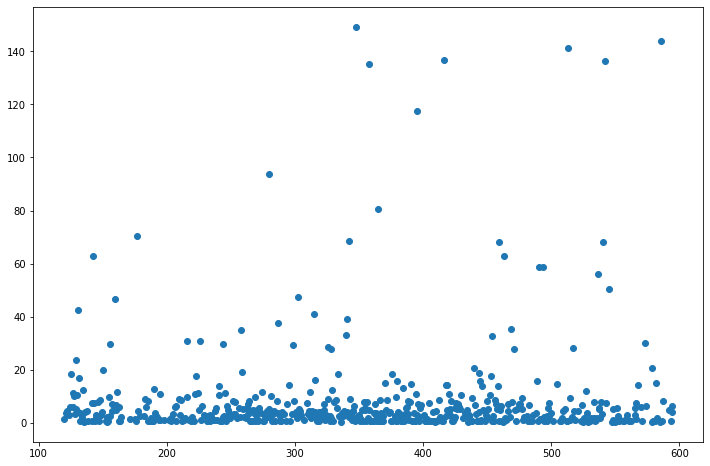

In [300]:
foldedpowers = np.array(foldedpowers)
foldedlonavgs = np.array(foldedlonavgs)
lonavgs = []
meds = []
stds = []
ns = []
for lonavg in sorted(set(foldedlonavgs))[:-2]:
#     print(f'{wavelen}: {np.nanmedian(foldedpowers[np.where(foldedwavelens==wavelen)])}')
    if True:
        lonavgs.append(lonavg)
        meds.append(np.nanmedian(foldedpowers[np.where(foldedlonavgs==lonavg)]))
        stds.append(np.nanstd(foldedpowers[np.where(foldedlonavgs==lonavg)]))
        ns.append(len(foldedpowers[np.where(foldedlonavgs==lonavg)]))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
# plt.ylim(0, 15)
plt.scatter(lonavgs, meds, label='median')
# for x, y in zip(lonavgs, meds):
#     label = '({:.2f}, {:.2f})'.format(x, y)
#     plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')
# plt.plot(lonavgs, stds, 'bo-', color='red', label='std')
# for x, y in zip(lonavgs, stds):
#     label = '({:.2f}, {:.2f})'.format(x, y)
#     plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')

# textstr = ''
# for idx in range(len(sorted(set(foldedwavelens))[:-2])):
#     textstr += str(sorted(set(foldedwavelens))[:-2]) + ' : ' + str(ns[idx]) + '\n'
# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# plt.legend()
plt.show()
# plt.savefig('graphs/wavelendependence.png')

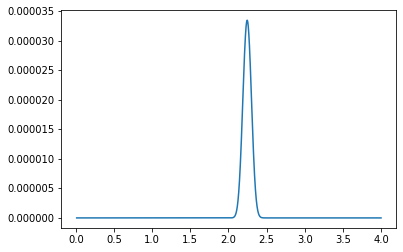

In [19]:
# x = np.arange(100)
# y = np.sin(x)
# plt.scatter(x, y)
# f, p = LombScargle(foldeddates[np.argwhere(foldedpowers < 50)].flatten(),
#                    foldedpowers[np.argwhere(foldedpowers < 50)].flatten()).autopower()
frequency = np.linspace(0.01, 4.00, 6000)
ls = LombScargle(foldeddates[np.argwhere(foldedpowers < 50)].flatten(),
                   foldedpowers[np.argwhere(foldedpowers < 50)].flatten())
power = ls.power(frequency)
fap = ls.false_alarm_probability(power, method='naive')
plt.plot(frequency, power * (1-fap))

frequency[np.argmax(power * (1-fap))]

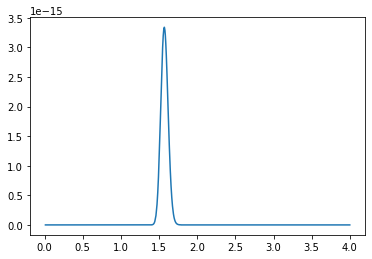

In [20]:
# x = np.arange(100)
# y = np.sin(x)
# plt.scatter(x, y)
# f, p = LombScargle(foldeddates[np.argwhere(foldedpowers < 50)].flatten(),
#                    foldedpowers[np.argwhere(foldedpowers < 50)].flatten()).autopower()
frequency = np.linspace(0.01, 4.00, 20000)
ls = LombScargle(foldeddates[~np.isnan(foldedpowers)].flatten(),
                   foldedpowers[~np.isnan(foldedpowers)].flatten())
power = ls.power(frequency)
fap = ls.false_alarm_probability(power, method='baluev')
plt.plot(frequency, power * (1-fap))

frequency[np.argmax(power * (1-fap))]

In [217]:
foldeddf

,normeddate,absdate,power
0,0.391229,1997-09-19,9.153333
1,0.389769,1997-09-17,1.590000
2,0.096347,1996-08-11,7.627114
3,0.897053,1999-08-13,0.000000
4,0.973723,1999-11-26,3.056667
...,...,...,...
945,0.565215,2016-02-29,12.297811
946,0.435971,2015-11-03,0.000000
947,0.820372,2016-10-19,0.680000
948,0.937614,2017-02-03,26.717855


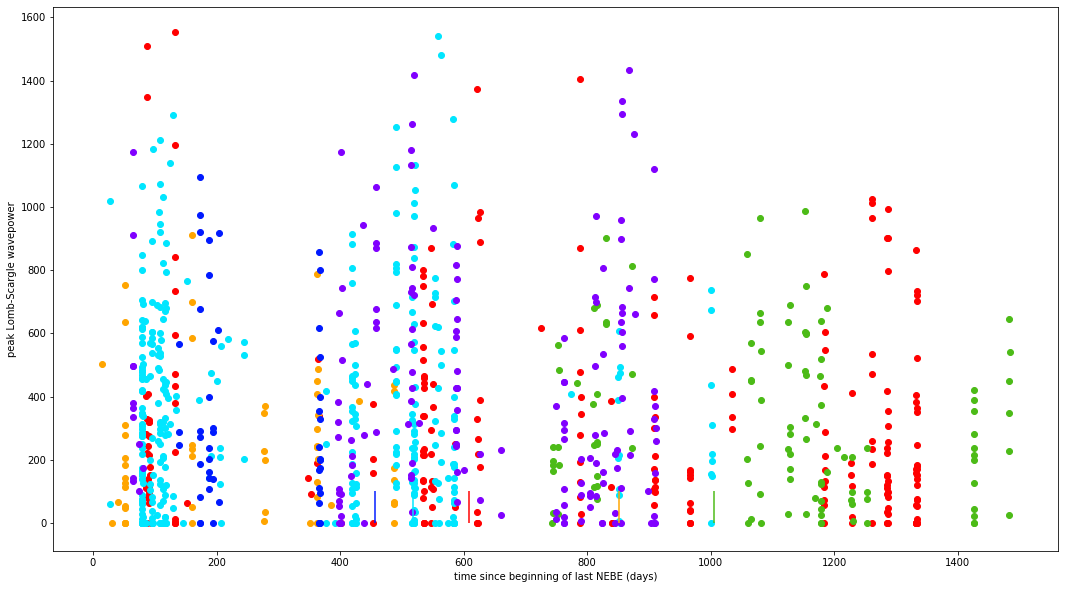

<Figure size 432x288 with 0 Axes>

In [230]:
cmap = np.array([[1, 0, 0, 1], [1, 0.647, 0, 1], [0.298, 0.733, 0.090, 1], [0, 0.9, 1, 1], [0, 0.1, 1, 1], [0.5, 0, 1, 1]])
foldedabsdates = []
foldedabspowers = []
absends = []
pd = []
starttostarts = []

flattened_dates = foldeddf['absdate']
flattened_wavepowers = foldeddf['power']

for d in range(len(startdates)-1):
    starttostarts.append((datetime.timestamp(startdates[d+1])-datetime.timestamp(startdates[d]))//86400)
plt.figure(figsize=(18,10))
for dateidx in range(len(startdates)-1):
    for obsidx in range(len(flattened_dates)):
        if flattened_dates[obsidx] > startdates[dateidx] and flattened_dates[obsidx] < startdates[dateidx+1]:
            foldedabsdates.append((datetime.timestamp(flattened_dates[obsidx])-datetime.timestamp(startdates[dateidx]))/86400)
            foldedabspowers.append(flattened_wavepowers[obsidx])
            pd.append(dateidx)
    absends.append((datetime.timestamp(enddates[dateidx])-datetime.timestamp(startdates[dateidx]))/86400)

plotnums = []
plotted = 0
for p in set(pd):
    plotnums.append(plotted)
    plotted += pd.count(p)
plotnums.append(plotted)
for p in range(len(set(pd))):
    plt.scatter(foldedabsdates[plotnums[p]:plotnums[p+1]], foldedabspowers[plotnums[p]:plotnums[p+1]], color=cmap[p])
pd = np.array(pd)
for idx in range(len(absends)-1):
    plt.vlines(absends[idx], ymin=0, ymax=100, color=cmap[idx])
plt.xlabel('time since beginning of last NEBE (days)')
plt.ylabel('peak Lomb-Scargle wavepower')
plt.savefig('graphs/absolute_times.png')
plt.show()
plt.clf()

In [236]:
np.max(foldeddf['power'])

1553.9672573485464

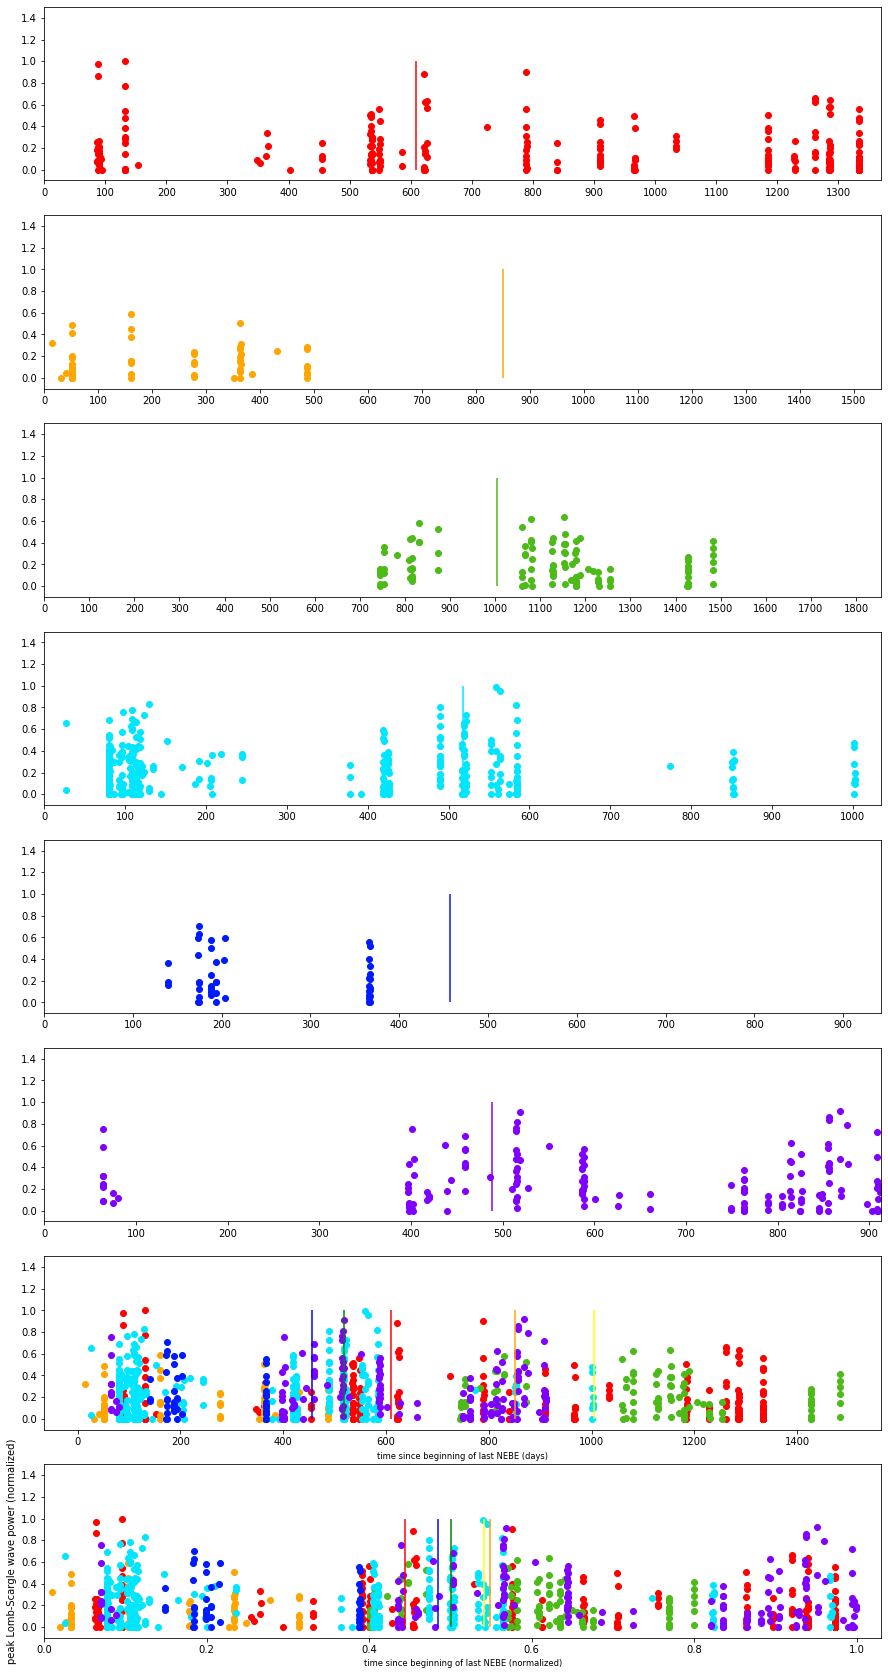

In [242]:
fig, ax = plt.subplots(8,1, figsize=(15, 30))
plt.ylabel('peak Lomb-Scargle wave power (normalized)')
for idx in set(pd):
    ax[idx].set_xlim(0, starttostarts[idx])
    ax[idx].set_xticks(np.arange(0, starttostarts[idx]+1, 100))
    ax[idx].scatter(np.array(foldedabsdates)[np.where(pd==idx)], np.array(foldedabspowers)[np.where(pd==idx)] /np.max(foldeddf['power']), color=cmap[idx])
    ax[idx].vlines(absends[idx], ymin=0, ymax=1,color=cmap[idx])
    ax[idx].set_ylim(-.1, 1.5)
    
ax[6].set_ylim(-.1, 1.5)
for p in range(len(set(pd))):
    ax[6].scatter(foldedabsdates[plotnums[p]:plotnums[p+1]], np.array(foldedabspowers)[plotnums[p]:plotnums[p+1]] /np.max(foldeddf['power']), color=cmap[p])
for idx in range(len(absends)-1):
    ax[6].vlines(absends[idx], ymin=0, ymax=1, color=colors[idx])

ax[7].set_title('time since beginning of last NEBE (days)', fontsize='small')
ax[7].set_xlim(0, 1.03)
ax[7].set_ylim(-.1, 1.5)
for p in range(len(set(pd))):
    ax[7].scatter(foldeddf['normeddate'].tolist()[plotnums[p]:plotnums[p+1]], np.array(foldeddf['power'].tolist())[plotnums[p]:plotnums[p+1]] /np.max(foldeddf['power']), color=cmap[p])
for idx in range(len(absends)-1):
    ax[7].vlines(normedends[idx], ymin=0, ymax=1, color=colors[idx])
plt.xlabel('time since beginning of last NEBE (normalized)', fontsize='small')

# plt.show()
plt.savefig('graphs/combined.png')

In [146]:
for idx in set(pd):
    print(np.nanmedian(np.array(foldedabspowers)[np.where(pd==idx)]))

0.6291109528032751
0.5730597504839858
0.6976142858366646
0.7357798445614412
0.696237158189289
0.7000656337698505


In [273]:
df

,obsid,lonstart,lonend,freq,power,fap,date,wavelen
0,jcf041046,212,442,[0.3130434782608696 0.9391304347826087 1.5652...,[3.6937787500990433 3.430172440591277 0.55777...,[4.375227249382902e-34 5.954538378831842e-33 ...,2015-12-14,2.16
1,jcf207212,359,595,[0.3050847457627119 0.9152542372881356 1.5254...,[9.192405793606605 8.336109653625932 0.783102...,[3.3724824483840595e-63 5.458945968206288e-61...,2010-06-24,2.3
2,jcf0038900398,186,412,[7.327433628318585 7.964601769911504 0.318584...,[1.384423960260764 1.022579998146142 0.353056...,[1.0816352225048015e-17 4.724614100717587e-15...,2017-05-20,2.12
3,j0349,39,278,[0.301255230125523 0.9037656903765691 1.50627...,[12.738728719974933 12.27190997219708 0.55750...,[5.125106510320959e-35 8.904818631273209e-34 ...,1997-09-19,2.14
4,cal_jc01260131,58,293,[0.3063829787234042 0.9191489361702125 1.5319...,[9.184249974513534 7.808457769227422 0.901841...,[1.7238664783863349e-81 3.630666107043772e-80...,2009-08-05,2.3
...,...,...,...,...,...,...,...,...
1116,jcf115120,449,682,[2.163090128755365 2.7811158798283264 1.54506...,[4.846076416836878 3.391658791365966 0.636311...,[1.7395153247344817e-41 3.4995724277482786e-4...,2010-06-25,2.17
1117,jcf06950697,7,264,[0.2801556420233463 0.840466926070039 1.40077...,[0.45373966922664466 0.4532001321892208 0.439...,[4.622191361248287e-27 1.1483979908076704e-25...,1999-11-26,2.03
1118,jf0151,309,535,[0.3185840707964602 0.9557522123893805 1.5929...,[3.7530035142798406 2.8734443081807615 0.7830...,[9.179105236212056e-59 8.981196713737838e-58 ...,1999-01-30,2.1
1119,jc00630066,112,384,[0.2647058823529412 0.7941176470588236 1.3235...,[2.7833098254808015 2.7390282519756077 0.6297...,[1.317599063190909e-44 9.235495722111987e-43 ...,2009-07-20,2


In [292]:
c=0
for obsid in df['obsid'].tolist():
    if 'jcf' in obsid and 'flat' not in obsid:
        c += 1
c

625

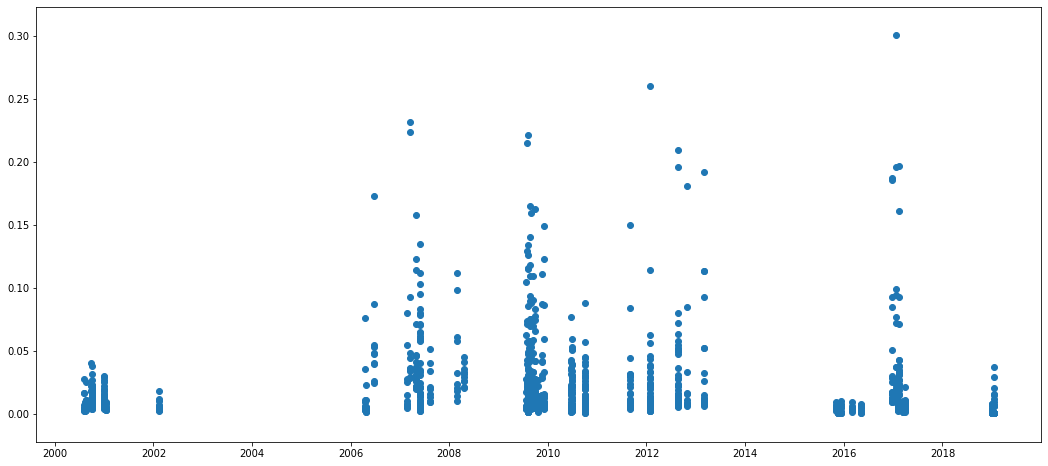

In [12]:
plt.figure(figsize=(18,8))
fftdata = pd.read_csv("fourierdata.csv")
# plt.scatter(foldeddates, foldedpowers)
plt.scatter([datetime.strptime(x, '%Y-%m-%d') for x in fftdata['date']], fftdata['fft_power'])

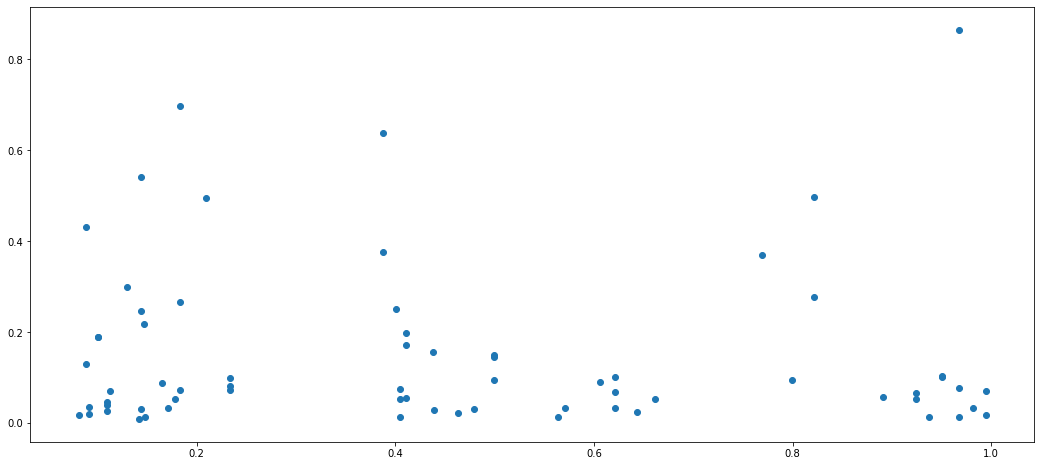

In [21]:
foldedfftdates = []
foldedfftpowers = []
minpower = np.min(fftdata['fft_power'].tolist())
maxpower = np.max(fftdata['fft_power'].tolist())
for i, row in fftdata.iterrows():
    if i == 0 or  i % 15 == 0:
        obsdate = datetime.strptime(row['date'], '%Y-%m-%d')
        for dateidx in range(len(startdates)-1):
            if obsdate < startdates[dateidx+1] and obsdate > startdates[dateidx]:
                foldeddate = (datetime.timestamp(obsdate) - datetime.timestamp(startdates[dateidx])) / (datetime.timestamp(startdates[dateidx+1]) - datetime.timestamp(startdates[dateidx]))
                foldedfftdates.append(foldeddate)
                normedfoldedfftpower = (row['fft_power']-minpower)/(maxpower-minpower)
                foldedfftpowers.append(normedfoldedfftpower)
            
plt.figure(figsize=(18,8))
plt.scatter(foldedfftdates, foldedfftpowers)